<a href="https://colab.research.google.com/github/SirDurzo/Instagram_influencers_kaggleDS_marketing_research_1012024/blob/main/Instagram_influencers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reviewing a new to me data, supplied by Kaggle.com (https://www.kaggle.com/datasets/ankulsharma150/marketing-analytics-project). Its a dataset of the top 1000 accounts. From the initial column descriptions we can get insights into the amount of followers each influencer has, their categorical realm of influence and how engaged their followers are.

Will start off by importing the needed libraries for early exploration and analysis of the metrics.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing the dataset for review and looking at how the data initially looks

---



In [ ]:
df_influencers = pd.read_csv('Instagram-Data.csv')

df_influencers.head()

,Country,Rank,Account,Title,Link,Category,Followers,Audience Country,Authentic engagement,Engagement avg,Scraped
0,All,1,cristiano,Cristiano Ronaldo,https://www.instagram.com/cristiano/,Sports with a ball,400100000,India,7800000,9500000,50:24.8
1,All,2,kyliejenner,Kylie 🤍,https://www.instagram.com/kyliejenner/,Fashion|Modeling|Beauty,308800000,United States,6200000,10100000,50:24.8
2,All,3,leomessi,Leo Messi,https://www.instagram.com/leomessi/,Sports with a ball|Family,306300000,Argentina,4800000,6500000,50:24.8
3,All,4,kendalljenner,Kendall,https://www.instagram.com/kendalljenner/,Modeling|Fashion,217800000,United States,3400000,5400000,50:24.8
4,All,5,selenagomez,Selena Gomez,https://www.instagram.com/selenagomez/,Music|Lifestyle,295800000,United States,2700000,3600000,50:24.8


In [ ]:
df_influencers.count()

,0
Country,1000
Rank,1000
Account,1000
Title,983
Link,1000
Category,909
Followers,1000
Audience Country,993
Authentic engagement,1000
Engagement avg,1000


Can populate the non Title entries that dont have an entry with "Not applicable" or similar, same with category, though will likely just use generic instead as thats more applicable in the category column. Ill remove the countries without an entries and see how that looks but may put it back with global if needed.

In [ ]:
df_influencers['Category'].nunique()

165

I want to see if categorically it makes sense to to target advertise in those categories or influencers specifically

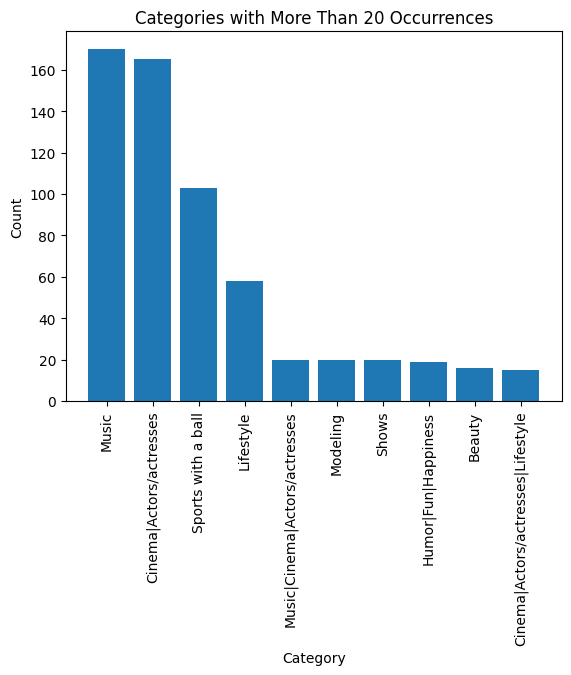

In [ ]:
#Group by 'Category' and get the count of each unique category
category_counts = df_influencers['Category'].value_counts()

#Filter the categories that have more than 10 occurrences
category_counts_filtered = category_counts[category_counts > 10]

#Create the bar graph
plt.bar(category_counts_filtered.index, category_counts_filtered.values)

#Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Categories with More Than 20 Occurrences')

#Rotate x labels for better readability
plt.xticks(rotation=90)

#Display the graph
plt.show()

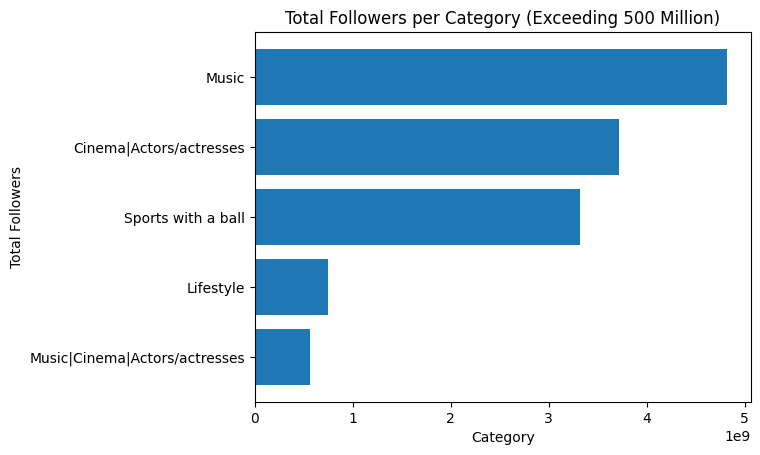

In [ ]:
followers_per_category = df_influencers.groupby('Category')['Followers'].sum()
followers_per_category_filtered = followers_per_category[followers_per_category > 5e8]
followers_per_category_filtered = followers_per_category_filtered.sort_values(ascending=True)

plt.barh(followers_per_category_filtered.index, followers_per_category_filtered.values)

plt.xlabel('Category')
plt.ylabel('Total Followers')
plt.title('Total Followers per Category (Exceeding 500 Million)')

plt.xticks(rotation=0)

plt.show()

Its obvious there are a few popular categories but how doe that look against the total number?

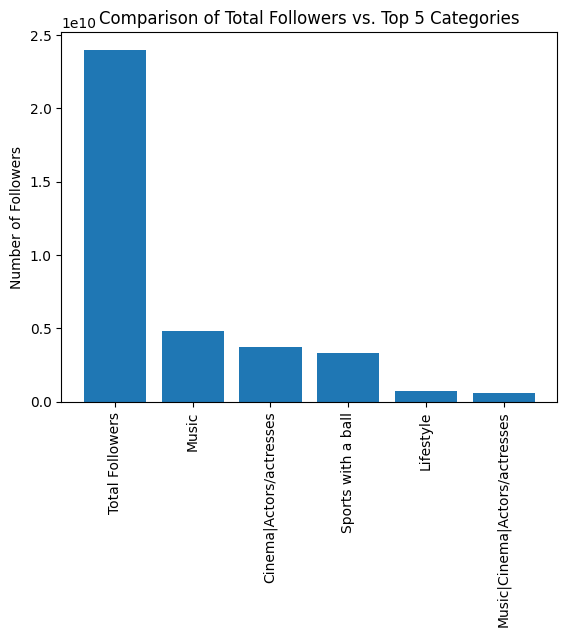

In [ ]:
followers_per_category = df_influencers.groupby('Category')['Followers'].sum()
total_followers = followers_per_category.sum()

top_5_categories = followers_per_category.nlargest(5)

comparison_data = pd.Series({'Total Followers': total_followers})
comparison_data = pd.concat([comparison_data, top_5_categories])

plt.bar(comparison_data.index, comparison_data.values)

plt.ylabel('Number of Followers')
plt.title('Comparison of Total Followers vs. Top 5 Categories')

plt.xticks(rotation=90)

plt.show()

Showing that Music and sports with a ball are likely areas to target marketting strategies. Cinema/Actors/Actress's are all based on individuals rather than an a category.

In [ ]:
df_influencers.head()

,Country,Rank,Account,Title,Link,Category,Followers,Audience Country,Authentic engagement,Engagement avg,Scraped
0,All,1,cristiano,Cristiano Ronaldo,https://www.instagram.com/cristiano/,Sports with a ball,400100000,India,7800000,9500000,50:24.8
1,All,2,kyliejenner,Kylie 🤍,https://www.instagram.com/kyliejenner/,Fashion|Modeling|Beauty,308800000,United States,6200000,10100000,50:24.8
2,All,3,leomessi,Leo Messi,https://www.instagram.com/leomessi/,Sports with a ball|Family,306300000,Argentina,4800000,6500000,50:24.8
3,All,4,kendalljenner,Kendall,https://www.instagram.com/kendalljenner/,Modeling|Fashion,217800000,United States,3400000,5400000,50:24.8
4,All,5,selenagomez,Selena Gomez,https://www.instagram.com/selenagomez/,Music|Lifestyle,295800000,United States,2700000,3600000,50:24.8


In [ ]:
df_followers_sorted = df_influencers.sort_values(by='Followers', ascending=False)

df_followers_sorted.head()

,Country,Rank,Account,Title,Link,Category,Followers,Audience Country,Authentic engagement,Engagement avg,Scraped
28,All,29,instagram,Instagram,https://www.instagram.com/instagram/,Photography,469600000,India,490400,608100,50:24.8
0,All,1,cristiano,Cristiano Ronaldo,https://www.instagram.com/cristiano/,Sports with a ball,400100000,India,7800000,9500000,50:24.8
1,All,2,kyliejenner,Kylie 🤍,https://www.instagram.com/kyliejenner/,Fashion|Modeling|Beauty,308800000,United States,6200000,10100000,50:24.8
2,All,3,leomessi,Leo Messi,https://www.instagram.com/leomessi/,Sports with a ball|Family,306300000,Argentina,4800000,6500000,50:24.8
4,All,5,selenagomez,Selena Gomez,https://www.instagram.com/selenagomez/,Music|Lifestyle,295800000,United States,2700000,3600000,50:24.8


Looking at the followers per Country, and as expected, the number is exceedingly high for the US.

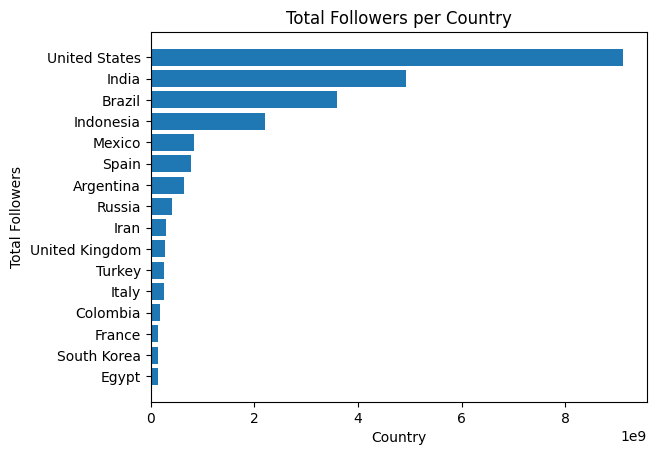

In [ ]:
followers_per_country = df_influencers.groupby('Audience Country')['Followers'].sum()
followers_per_country_filtered = followers_per_country[followers_per_country > 1e8]
followers_per_country_filtered = followers_per_country_filtered.sort_values(ascending=True)

plt.barh(followers_per_country_filtered.index, followers_per_country_filtered.values)

plt.xlabel('Country')
plt.ylabel('Total Followers')
plt.title('Total Followers per Country')

plt.xticks(rotation=0)
followers_per_country
plt.show()

Looking at the popular categories in the US

In [35]:
#create US Data Frame
df_us = df_influencers[df_influencers['Audience Country'] == 'United States']

#Remove the cinemas actors and actreses
followers_per_category_us_filtered_act = df_us[~df_us['Category'].str.contains('Cinema|Actors/actresses', case=False, na=False, regex=True)]

followers_per_category_us = followers_per_category_us_filtered_act.groupby('Category')['Followers'].sum()
followers_per_category_us = followers_per_category_us.sort_values(ascending=False)

print(followers_per_category_us)


Category
Music                                1883500000
Music|Fashion                         375000000
Music|Lifestyle                       317700000
Fashion|Modeling|Beauty               308800000
Sports with a ball                    302900000
                                        ...    
Modeling|Music                          6800000
Clothing|Outfits                        6700000
Lifestyle|Modeling|Fashion              6700000
Lifestyle|Shows|Computers|Gadgets       6000000
Lifestyle|Fashion                       5000000
Name: Followers, Length: 74, dtype: int64


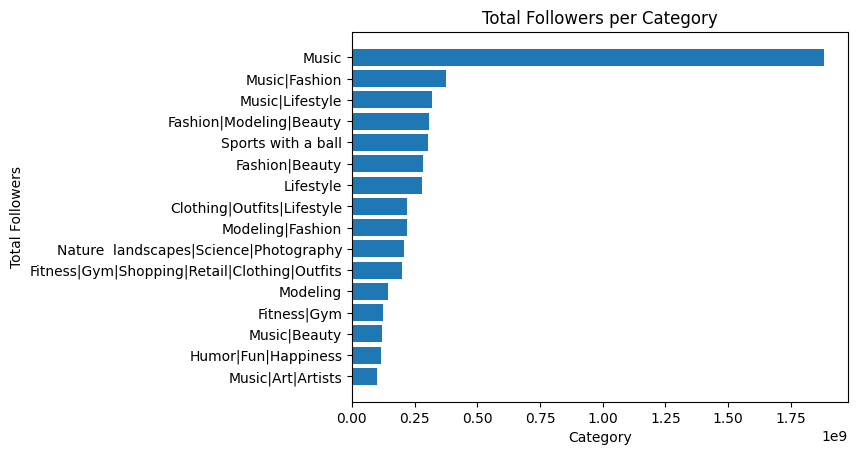

In [36]:
followers_per_category_us_filtered = followers_per_category_us [followers_per_category_us > 1e8]
followers_per_category_us_filtered = followers_per_category_us_filtered.sort_values(ascending=True)

plt.barh(followers_per_category_us_filtered.index, followers_per_category_us_filtered.values)

plt.xlabel('Category')
plt.ylabel('Total Followers')
plt.title('Total Followers per Category in the US')

plt.xticks(rotation=0)
followers_per_category_us_filtered
plt.show()